Import Required Libraries

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

Define Dataset Path and Load Images

In [3]:
# Define your dataset path
base_path = r"Face_Dataset/Resized_rgb(64X64)"  # final processed images folder

persons = sorted(os.listdir(base_path))
print("Detected Persons:", persons)

X = []
y = []

for idx, person in enumerate(persons):
    person_folder = os.path.join(base_path, person)
    for img_name in os.listdir(person_folder):
        img_path = os.path.join(person_folder, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            X.append(img)
            y.append(idx)

X = np.array(X)
y = np.array(y)

print("Images Loaded:", X.shape)
print("Labels Loaded:", y.shape)


Detected Persons: ['1', '2', '3', '4', '5']
Images Loaded: (2136, 64, 64, 3)
Labels Loaded: (2136,)


Split Dataset into Training and Testing

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (1708, 64, 64, 3)
Testing set: (428, 64, 64, 3)


Normalize Pixel Values

In [5]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Build the ANN Model

In [6]:
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(persons), activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\Kavyanjali\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,179,525 (12.13 MB)

 Trainable params: 3,179,525 (12.13 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4629 - loss: 2.0703 - val_accuracy: 0.9696 - val_loss: 0.1865
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8860 - loss: 0.3679 - val_accuracy: 0.9813 - val_loss: 0.0757
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9453 - loss: 0.1658 - val_accuracy: 0.9907 - val_loss: 0.0551
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9701 - loss: 0.1133 - val_accuracy: 0.9883 - val_loss: 0.0443
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9822 - loss: 0.0749 - val_accuracy: 0.9860 - val_loss: 0.0492
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9732 - loss: 0.0829 - val_accuracy: 0.9907 - val_loss: 0.0496
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9626 - loss: 0.1038 - val_accuracy: 0.9883 - val_loss: 0.0557
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9749 - loss: 0.0645 - val_accuracy: 0.9883 - v

Evaluate the Model (Training & Testing Accuracy)

In [8]:
# Training accuracy
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)

# Testing accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("\nTraining Accuracy:", round(train_acc * 100, 2), "%")
print("Testing Accuracy:", round(test_acc * 100, 2), "%")

# Detailed classification report
y_pred = np.argmax(model.predict(X_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=persons))



Training Accuracy: 99.77 %
Testing Accuracy: 98.83 %
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step

Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.99      0.98        91
           2       1.00      0.96      0.98        55
           3       0.99      0.98      0.99       114
           4       0.99      1.00      1.00       120
           5       0.98      1.00      0.99        48

    accuracy                           0.99       428
   macro avg       0.99      0.99      0.99       428
weighted avg       0.99      0.99      0.99       428



Prediction & Display Code

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Actual Person: 3
Predicted Person: 3


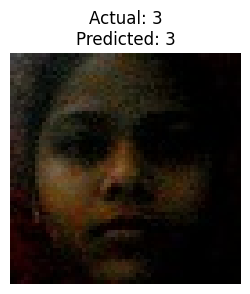

In [27]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Pick a random test image
i = random.randint(0, len(X_test) - 1)
sample = X_test[i].reshape(1, 64, 64, 3)

# Make prediction
pred = np.argmax(model.predict(sample), axis=1)[0]

# Print actual and predicted names
print("\nActual Person:", persons[y_test[i]])
print("Predicted Person:", persons[pred])

# Display the image
plt.figure(figsize=(3, 3))
plt.imshow(X_test[i])        # show the RGB image
plt.axis('off')
plt.title(f"Actual: {persons[y_test[i]]}\nPredicted: {persons[pred]}")
plt.show()
